## Data augmentations for OCR demo

This notebook shows an effective data augmentation method for OCR, as discussed in this medium article:



Here is the function that you can give a PIL image and returns one with augmentations:

In [66]:
import random
import cv2
import numpy as np
import albumentations as A

#gets PIL image and returns augmented PIL image
def augment_img(img):
  #only augment 3/4th the images
  if random.randint(1, 4) > 3:
      return img
  
  img = np.asarray(img)     #convert to numpy for opencv

  # morphological alterations
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
  if random.randint(1, 5) == 1:
    # dilation because the image is not inverted
    img = cv2.erode(img, kernel, iterations=random.randint(1, 2))
  if random.randint(1, 6) == 1:
    # erosion because the image is not inverted
    img = cv2.dilate(img, kernel,iterations=random.randint(1, 1))
  
  transform = A.Compose([
      
    A.OneOf([
      #add black pixels noise
      A.OneOf([
             A.RandomRain(brightness_coefficient=1.0, drop_length=2, drop_width=2, drop_color = (0, 0, 0), blur_value=1, rain_type = 'drizzle', p=0.05), 
              A.RandomShadow(p=1),
              A.PixelDropout(p=1),
         ], p=0.9),

      #add white pixels noise
      A.OneOf([
              A.PixelDropout(dropout_prob=0.5,drop_value=255,p=1),
             A.RandomRain(brightness_coefficient=1.0, drop_length=2, drop_width=2, drop_color = (255, 255, 255), blur_value=1, rain_type = None, p=1), 
        ], p=0.9),
    ], p=1),

    #transformations
    A.OneOf([
            A.ShiftScaleRotate(shift_limit=0, scale_limit=0.25, rotate_limit=2, border_mode=cv2.BORDER_CONSTANT, value=(255,255,255),p=1),
            A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0, rotate_limit=8, border_mode=cv2.BORDER_CONSTANT, value=(255,255,255),p=1),
            A.ShiftScaleRotate(shift_limit=0.02, scale_limit=0.15, rotate_limit=11, border_mode=cv2.BORDER_CONSTANT, value=(255,255,255),p=1),  
            A.Affine(shear=random.randint(-5, 5),mode=cv2.BORDER_CONSTANT, cval=(255,255,255), p=1)          
       ], p=0.5),
    A.Blur(blur_limit=5,p=0.25),
  ])
  img = transform(image=img)['image']  
  image = Image.fromarray(img)   
  return image


Let's run the above function on some samples

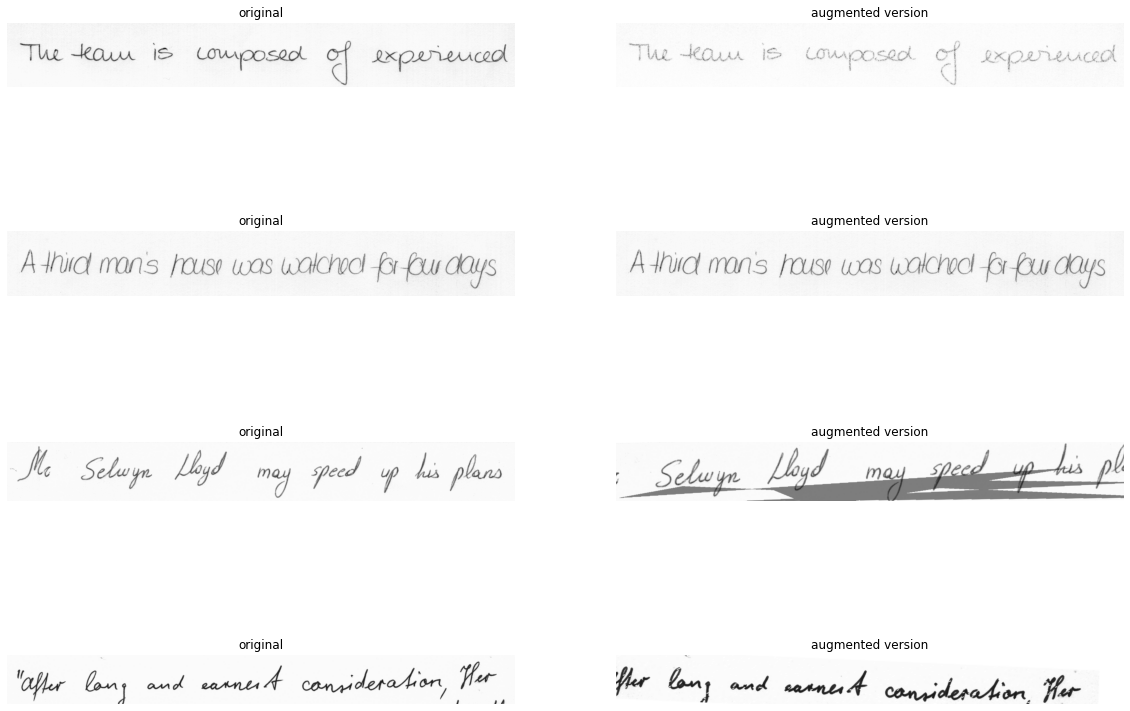

In [67]:
import matplotlib.pyplot as plt
from PIL import Image
import requests

#take sample and do augmentations
sample_amount = 8
image1 = Image.open(requests.get('https://neontreebot.be/data/a02-012-line00.png', stream=True).raw).convert("RGB")
image2 = Image.open(requests.get('https://neontreebot.be/data/a02-062-line00.png', stream=True).raw).convert("RGB")
image3 = Image.open(requests.get('https://neontreebot.be/data/a06-000-line00.png', stream=True).raw).convert("RGB")
image4 = Image.open(requests.get('https://neontreebot.be/data/a06-075-line00.png', stream=True).raw).convert("RGB")
plt.figure(figsize=(20,30))
i = 1
plt.subplot(sample_amount, 2, i).imshow(image1)
plt.subplot(sample_amount, 2, i).set_title('original')
plt.subplot(sample_amount, 2, i).set_axis_off() 
plt.subplot(sample_amount, 2, i + 1).imshow(augment_img(image1))
plt.subplot(sample_amount, 2, i + 1).set_title('augmented version')
plt.subplot(sample_amount, 2, i + 1).set_axis_off() 
i = 3
plt.subplot(sample_amount, 2, i).imshow(image2)
plt.subplot(sample_amount, 2, i).set_title('original')
plt.subplot(sample_amount, 2, i).set_axis_off() 
plt.subplot(sample_amount, 2, i + 1).imshow(augment_img(image2))
plt.subplot(sample_amount, 2, i + 1).set_title('augmented version')
plt.subplot(sample_amount, 2, i + 1).set_axis_off()
i = 5
plt.subplot(sample_amount, 2, i).imshow(image3)
plt.subplot(sample_amount, 2, i).set_title('original')
plt.subplot(sample_amount, 2, i).set_axis_off() 
plt.subplot(sample_amount, 2, i + 1).imshow(augment_img(image3))
plt.subplot(sample_amount, 2, i + 1).set_title('augmented version')
plt.subplot(sample_amount, 2, i + 1).set_axis_off() 
i = 7
plt.subplot(sample_amount, 2, i).imshow(image4)
plt.subplot(sample_amount, 2, i).set_title('original')
plt.subplot(sample_amount, 2, i).set_axis_off() 
plt.subplot(sample_amount, 2, i + 1).imshow(augment_img(image4))
plt.subplot(sample_amount, 2, i + 1).set_title('augmented version')
plt.subplot(sample_amount, 2, i + 1).set_axis_off() 
  

# Functions to do 1 augmentation only
may be useful for your testing. I used it for generating image samples for the medium article

**morphological alterations**

In [13]:
def augment_img_dilate(img):
  img = np.asarray(img)     #convert to numpy
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
  # dilation because the image is not inverted
  img = cv2.erode(img, kernel, iterations=random.randint(3, 4))
  image = Image.fromarray(img)   
  return image

In [7]:
def augment_img_erode(img):
  img = np.asarray(img)     #convert to numpy
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
  # erosion because the image is not inverted
  img = cv2.dilate(img, kernel,iterations=random.randint(1, 2))
  image = Image.fromarray(img)   
  return image

**black pixel noise**

In [19]:
def augment_img_RandomRain_black(img):
  img = np.asarray(img)     #convert to numpy
  transform = A.Compose([
  #add black pixels noise: RandomRain
  A.RandomRain(brightness_coefficient=1.0, drop_length=2, drop_width=2, drop_color = (0, 0, 0), blur_value=1, rain_type = 'drizzle', p=1)
    ])
  img = transform(image=img)['image']  
  image = Image.fromarray(img)   
  return image

In [21]:
def augment_img_RandomShadow(img):
  img = np.asarray(img)     #convert to numpy
  transform = A.Compose([
  #add black pixels noise: RandomShadow
  A.RandomShadow(p=1)
  #A.PixelDropout(p=1),
  ])
  img = transform(image=img)['image']  
  image = Image.fromarray(img)   
  return image

In [24]:
def augment_img_PixelDropout_black(img):
  img = np.asarray(img)     #convert to numpy
  transform = A.Compose([
  #add black pixels noise: PixelDropout
  A.PixelDropout(p=1)
  ])
  img = transform(image=img)['image']  
  image = Image.fromarray(img)   
  return image

**white pixel noise**

In [29]:
def augment_img_RandomRain_white(img):
  img = np.asarray(img)     #convert to numpy
  transform = A.Compose([
  #add white pixels noise: RandomRain
  A.RandomRain(brightness_coefficient=1.0, drop_length=3, drop_width=3, drop_color = (255, 255, 255), blur_value=1, rain_type = None, p=1)
  ])
  img = transform(image=img)['image']  
  image = Image.fromarray(img)   
  return image              
            

In [32]:
def augment_img_PixelDropout_white(img):
  img = np.asarray(img)     #convert to numpy
  transform = A.Compose([
  #add white pixels noise: PixelDropout
  A.PixelDropout(dropout_prob=0.5,drop_value=255,p=1)
  ])
  img = transform(image=img)['image']  
  image = Image.fromarray(img)   
  return image

**transformations**

In [35]:
def augment_img_ShiftScaleRotate(img):
  img = np.asarray(img)     #convert to numpy
  transform = A.Compose([
  #add white pixels noise: PixelDropout
  A.OneOf([
            A.ShiftScaleRotate(shift_limit=0, scale_limit=0.25, rotate_limit=2, border_mode=cv2.BORDER_CONSTANT, value=(255,255,255),p=1),
            A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0, rotate_limit=8, border_mode=cv2.BORDER_CONSTANT, value=(255,255,255),p=1),
            A.ShiftScaleRotate(shift_limit=0.02, scale_limit=0.15, rotate_limit=11, border_mode=cv2.BORDER_CONSTANT, value=(255,255,255),p=1),  
            A.Affine(shear=random.randint(-5, 5),mode=cv2.BORDER_CONSTANT, cval=(255,255,255), p=1)          
       ], p=1)
    ])

  img = transform(image=img)['image']  
  image = Image.fromarray(img)   
  return image

In [44]:
def augment_img_Blur(img):
  img = np.asarray(img)     #convert to numpy
  transform = A.Compose([
  A.Blur(blur_limit=15,p=1),
   ])
  img = transform(image=img)['image']  
  image = Image.fromarray(img)   
  return image

